# Generating Markov Chains

Today's lab focuses on creating a Markov Chain given a state diagram.  To do this, we will need the computer to generate a random number.  Most computer software doesn't have the capability of generating a truly random number, so the software generates pseudo-random numbers, which are generated by an algorithm designed to mimic a random number.


## Invariant Distribution
Matrix $\mathbf{A}$ has eigenvalue $\lambda$ and associated eigenvector $\mathbf{v}$ if
$$
\mathbf{A} \mathbf{v} = \lambda \mathbf{v},
$$
where $\lambda$ is a constant and $\mathbf{v}$ is a vector.

To find the invariant distribution $\mathbf{\pi}$, we want to find the eigenvector $\mathbf{\pi}$ for matrix $\mathbf{T}$ that has eigenvalue equal to 1, or
$$
\mathbf{T} \mathbf{\pi} = 1 \mathbf{\pi}.
$$
But we also want $\mathbf{\pi}$ to be a probability vector, i.e., we want it to have a length of 1.

Given the following transition matrix from the Taxi problem, lets find the invariant distribution.

$$
\mathbf{T} = \begin{bmatrix} 0.5 & 0.1 & 0.3 \\ 0.2 & 0.4 & 0.3 \\ 0.3 & 0.5 & 0.4
\end{bmatrix}
$$

In [2]:
import numpy as np
import numpy.linalg as npl
# define T
T = np.matrix([[0.5,0.1,0.3],[0.2,0.4,0.3],[0.3,0.5,0.4]])
print(T)

# To do this we will use the built in function 'eig'

l, P = npl.eig(T)
print(l)
print(P)

# For this example, the first eigenvalue is one, so we want the 
# . first eigenvector, which is in the first column of P.
firstColumn = P[:,0]
print(firstColumn)
# to make the vector a probability distribution, we need to add up the
# . all of the numbers in the vector and divide by that total.
total = np.sum(firstColumn)
print(total)
# print the invariant distrubtion.
invariant = firstColumn / total
print(invariant)

[[ 0.5  0.1  0.3]
 [ 0.2  0.4  0.3]
 [ 0.3  0.5  0.4]]
[  1.00000000e+00   3.00000000e-01   9.59457222e-17]
[[ 0.51449576  0.81649658 -0.40824829]
 [ 0.51449576 -0.40824829 -0.40824829]
 [ 0.68599434 -0.40824829  0.81649658]]
[[ 0.51449576]
 [ 0.51449576]
 [ 0.68599434]]
1.71498585143
[[ 0.3]
 [ 0.3]
 [ 0.4]]


## Limiting Distribution
To find the limiting distribution for $\mathbf{T}$, we can multiply the matrix by itself 20 times to see if the columns converge to the same thing.

In [3]:
S = npl.matrix_power(T, 20)
print(S)

[[ 0.3  0.3  0.3]
 [ 0.3  0.3  0.3]
 [ 0.4  0.4  0.4]]


### Exercise
Find the invariant distribution for the following transition matrices.  [How would you check your answer?]

$$
\mathbf{T_1} = \begin{bmatrix} 0.5 & 0.1 \\ 0.5 & 0.9 \end{bmatrix}
\hspace{1cm}
\mathbf{T_2} = \begin{bmatrix} 0.2 & 0.8 \\ 0.8 & 0.2 \end{bmatrix}
\hspace{1cm}
\mathbf{T_3} = \begin{bmatrix} 0.5 & 0.25 & 0 \\ 0.5 & 0.5 & 0.5 \\ 0 & 0.25 & 0.5
\end{bmatrix}
$$

In [4]:
T = np.matrix([[0.5,0.1],[0.5,0.9]])
print(T)
l, P = npl.eig(T)
print(l)
print(P)

secondColumn = P[:,1]
print(secondColumn)
total = np.sum(secondColumn)
print(total)
invariant = secondColumn / total
print(invariant)

[[ 0.5  0.1]
 [ 0.5  0.9]]
[ 0.4  1. ]
[[-0.70710678 -0.19611614]
 [ 0.70710678 -0.98058068]]
[[-0.19611614]
 [-0.98058068]]
-1.17669681083
[[ 0.16666667]
 [ 0.83333333]]


In [5]:
T = np.matrix([[0.2,0.8],[0.8,0.2]])
print(T)
l, P = npl.eig(T)
print(l)
print(P)

column = P[:,0]
print(column)
total = np.sum(column)
print(total)
invariant = column / total
print(invariant)

[[ 0.2  0.8]
 [ 0.8  0.2]]
[ 1.  -0.6]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[ 0.70710678]
 [ 0.70710678]]
1.41421356237
[[ 0.5]
 [ 0.5]]


In [6]:
T = np.matrix([[0.5,0.25,0],[0.5,0.5,0.5],[0,0.25,0.5]])
print(T)
l, P = npl.eig(T)
print(l)
print(P)

column = P[:,0]
print(column)
total = np.sum(column)
print(total)
invariant = column / total
print(invariant)

[[ 0.5   0.25  0.  ]
 [ 0.5   0.5   0.5 ]
 [ 0.    0.25  0.5 ]]
[  1.00000000e+00   5.00000000e-01  -7.01902911e-17]
[[  4.08248290e-01  -7.07106781e-01   4.08248290e-01]
 [  8.16496581e-01   8.11214661e-16  -8.16496581e-01]
 [  4.08248290e-01   7.07106781e-01   4.08248290e-01]]
[[ 0.40824829]
 [ 0.81649658]
 [ 0.40824829]]
1.63299316186
[[ 0.25]
 [ 0.5 ]
 [ 0.25]]


## Module random within package numpy

First we will practice using python to generate a two types of random numbers: 

```python
numpy.random.rand() #a random decimal between 0 and 1,
numpy.random.randint(1, n) #integers from 1 to n-1, 
```

The pseudo-random nyber generator we use are provided by package numpy in its module random – full name `numpy.random`.
We introduce the abbreviation "npr" for this, along with the standard abbreviation "np" for numpy:
```python
import numpy as np
import numpy.random as npr
```


In [8]:
import numpy as np
import numpy.random as npr

This module contains numerous random number generators; here we look at just a few.

## Uniformly distributed real numbers: `numpy.random.rand`

First, the function `rand` (full name `numpy.random.rand`) generates uniformly diatributed real numbers in the interval $[0,1)$.
To generate a single value, use it with no argument:

In [9]:
npr.rand()

0.10403489252868736

### Exercise 1
Use a loop to generate 10 numbers randomly distributed between 0 and 1.

In [10]:
for i in range(0,10):
    myRand = npr.rand()
    print (myRand)

0.8878899327254324
0.15781872960513355
0.8661698418909152
0.05429457304901153
0.42759503410441124
0.516991085347249
0.43790804477287204
0.04414023311773885
0.6873743935553059
0.8758712394412884


To generate an array of values all at once, one can specify how many.

In [11]:
n_samples = 10
numbers = npr.rand(n_samples)
print(numbers)

[ 0.38234228  0.52628247  0.12592623  0.36873035  0.45054381  0.51901049
  0.18329482  0.87596313  0.1259661   0.59524765]


We can also generate multi-dimensional arrays, by giving the lengths of each dimension as arguments:

In [12]:
numbers2d = npr.rand(2,3)
print('A two-dimensional array of random numbers:\n', numbers2d)
numbers3d = npr.rand(2,3,4)
print('A three-dimensional array of random numbers:\n', numbers3d)

A two-dimensional array of random numbers:
 [[ 0.23060643  0.18560063  0.33379866]
 [ 0.71248213  0.62649026  0.51209577]]
A three-dimensional array of random numbers:
 [[[ 0.07966339  0.67133703  0.5831973   0.66132428]
  [ 0.83825587  0.05518596  0.23310048  0.07235732]
  [ 0.00683771  0.76778575  0.03181787  0.05955861]]

 [[ 0.72793553  0.21703275  0.86267376  0.92446245]
  [ 0.5566884   0.61929     0.158075    0.3713046 ]
  [ 0.74897297  0.77034866  0.1351789   0.16867213]]]


We can do the same using the following command with the exception that we can specify the lower and upper bounds with the first two arguments...


#### npr.uniform(lower,upper,(rows,cols))

In [13]:
npr.uniform(-1,1,(10,2))

array([[-0.16019378,  0.32673116],
       [-0.9627131 , -0.40980851],
       [ 0.15870356, -0.19013312],
       [-0.54737792, -0.50851623],
       [ 0.39549791, -0.98181524],
       [ 0.83352083, -0.36138651],
       [-0.11516772, -0.16383769],
       [ 0.60853418,  0.3006737 ],
       [-0.9631017 , -0.96375248],
       [ 0.43573116,  0.66969374]])

## Random integers: `numpy.random.randint`

One can generate integers, uniformly distributed betwen specified lower and upper values.  The following code filps a coin ten times (0 for tails, 1 for heads), counts up the number of each type of flip, and then plots a histogram of the results.

In [14]:
# First flip a coin ten times.
n = 10
coin = npr.randint(0, 2, n)
print(coin)

# One way to count the number of heads and tails:
heads = np.count_nonzero(coin == 1)
tails = np.count_nonzero(coin == 0)

#Use a plotting library to make a histogram
import matplotlib.pyplot as plt
x = [0,1]  #specify where on the x-axis you want to plot the histogram.
plt.bar(x,height=[heads,tails]) # the heaght of each bar.
plt.xticks(x, ['Heads','Tails']) # the name of each bar, shown below the x-axis.
plt.show() #show the plot

[0 1 1 1 1 1 0 0 0 1]


### Exercise 2
In the following cell write a program which rolls a six sided die $100$ times and count the number of each value.  Then plot a histogram to show how many of each number were rolled.

In [15]:
#initialize number of rolls
#roll die
# Count each outcome: this needs a list instead of an array:
#step through each value
    #count up values using .count(value) at the end of the list of die rolls
    #print out values

n = 100
rolls = npr.randint(1,7,n)
print(rolls)
print("I rolled a 6-sided die",n,"times", "and got")
sum = 0
for i in range(1,7):
    print("number",i,":",np.count_nonzero(rolls == i),"times")
    sum += np.count_nonzero(rolls == i)
    
print("total :  ",sum)

[2 2 1 5 3 1 2 5 2 2 5 1 6 2 1 3 1 3 1 6 2 5 6 3 1 6 4 5 2 1 3 5 1 2 5 3 2
 4 5 3 1 6 6 5 3 2 5 1 6 6 3 5 4 2 6 3 2 3 1 2 6 2 3 4 4 1 2 1 3 5 6 1 2 3
 6 3 1 2 4 3 5 6 2 4 3 3 5 6 6 3 3 1 2 6 6 4 6 2 5 2]
I rolled a 6-sided die 100 times and got
number 1 : 17 times
number 2 : 22 times
number 3 : 20 times
number 4 : 8 times
number 5 : 15 times
number 6 : 18 times
total :   100


# Long-Run behavior of a Markov Chain versus Generating a Markov Chain

Now we want to do two different things:
1) Explore the long run behavior of a Markov chain, i.e. to figure out what states the Markov chain will spend more or less time in in the long-run.
2) To generate states in a Markov chain.

For the first goal, all we need to do is multiply an initial state by a transition matrix repeatedly.

For the second goal, we will need to generate random behavior using a random number generator.

### Exercise 3
Given the following transition matrix for our rainy, cloudy, sunny example on the homework, 
$$
\mathbf{T} = 
\begin{bmatrix} 0.1 & 0.2 & 0.1 \\ 0.7 & 0.4 & 0.3 \\ 0.2 & 0.4 & 0.6 
\end{bmatrix}
$$
Start with an initial state of rainy, represented by the vector
$$
\begin{bmatrix} 1 \\ 0 \\ 0 
\end{bmatrix}
$$
and multiply by the transition matrix 100 times to determine the probabability of being in each state after 100 steps.


In [16]:
import numpy.linalg as npl
T = np.matrix([[0.1,0.2,0.1],[0.7,0.4,0.3],[0.2,0.4,0.6]])
print(T)
v = np.matrix([[1],[0],[0]])
print(v)
T_new = npl.matrix_power(T,100)
print(T_new)

w = np.matmul(T_new,v)
print(w)
import matplotlib.pyplot as plt
x = [0,1,2]  #specify where on the x-axis you want to plot the histogram.
plt.bar(x,height=w) # the heaght of each bar.
plt.xticks(x, ['rainy','cloudy','sunny']) # the name of each bar, shown below the x-axis.
plt.show() #show the plot 

[[ 0.1  0.2  0.1]
 [ 0.7  0.4  0.3]
 [ 0.2  0.4  0.6]]
[[1]
 [0]
 [0]]
[[ 0.13953488  0.13953488  0.13953488]
 [ 0.39534884  0.39534884  0.39534884]
 [ 0.46511628  0.46511628  0.46511628]]
[[ 0.13953488]
 [ 0.39534884]
 [ 0.46511628]]


To generate a Markov chain, we need to understand how to use a computer generated random number to select from more than one possible next states.

Let's take a transition matrix representing two states, ```up``` and ```down```:
$$
\mathbf{T} = \begin{bmatrix} 0.5 & 0.25 \\ 0.5 & 0.75 \end{bmatrix}
$$
and let's start in the state ```up``` and generate a Markov chain of states.

['up', 'up', 'up', 'up', 'up', 'down', 'down', 'down', 'down', 'up', 'up', 'down', 'up', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'up', 'up', 'up', 'up', 'down', 'up', 'down', 'down', 'up', 'down', 'up', 'up', 'up', 'up', 'up', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'up', 'up', 'up', 'up', 'down', 'down', 'down', 'up', 'down', 'down', 'down', 'up', 'up', 'down', 'up', 'down', 'down', 'down', 'up', 'down', 'down', 'up', 'down', 'down', 'down', 'down', 'up', 'up', 'down', 'down', 'down', 'down', 'up', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'up', 'down', 'down', 'up', 'up', 'up', 'down', 'up', 'up']


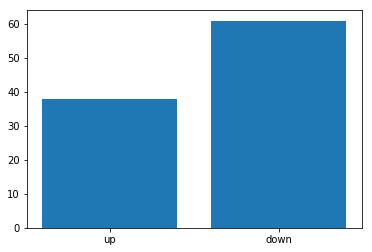

In [17]:
# Start in state up
currentState = 'up'
newState = 'down'
stateList = []
for i in range(1,100):
    stateList.append(currentState)
    myRand = npr.rand();
    if (currentState == 'up'):
        if (myRand < 0.5):
            newState = 'up' #stay in state 'up'
        elif (myRand >= 0.5 and myRand <=1):
            newState = 'down' #move to state 'down'
        else:
            print("Something bad happened!")
    else: #currentState = 'down'
        if (myRand < 0.25):
            newState = 'up' #move to state 'up'
        elif (myRand >= 0.25 and myRand <=1):
            newState = 'down' #stay in state 'down'
        else:
            print("Something bad happened!")
    currentState = newState
    
print(stateList)    
ups = stateList.count('up')
downs = stateList.count('down') 

import matplotlib.pyplot as plt
x = [0,1]  #specify where on the x-axis you want to plot the bars.
plt.bar(x,height=[ups,downs]) # the heaght of each bar.
plt.xticks(x, ['up','down']) # the name of each bar, shown below the x-axis.
plt.show() #show the plot 

### Exercise 4
Given the transition matrix for our rainy, cloudy, sunny example, 
$$
\mathbf{T} = 
\begin{bmatrix} 0.1 & 0.2 & 0.1 \\ 0.7 & 0.4 & 0.3 \\ 0.2 & 0.4 & 0.6 
\end{bmatrix}
$$
Start with an initial state of rainy and generate a Markov chain of states by using a random number generator to find the next state.


['rainy', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'sunny', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'sunny', 'sunny', 'sunny', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'sunny', 'sunny', 'cloudy', 'cloudy', 'sunny', 'rainy', 'cloudy', 'cloudy', 'sunny', 'rainy', 'cloudy', 'rainy', 'cloudy', 'rainy', 'cloudy', 'rainy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'sunny', 'rainy', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'rainy', 'cloudy', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'rainy', 'sunny', 'cloudy', 'cloudy', 'sunny', 'rainy', 'cloudy', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'sunny', 'sunny']


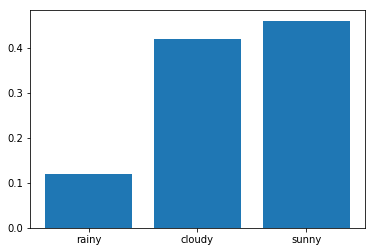

In [21]:
# Start in state 'rainy'
currentState = 'rainy'
newState = ''
stateList = []
for i in range(0,100):
    stateList.append(currentState)
    myRand = npr.rand();
    if (currentState == 'rainy'):
        if (myRand < 0.1):
            newState = 'rainy' #stay in state 'rainy'
        elif (myRand >= 0.1 and myRand < 0.1 + 0.7):
            newState = 'cloudy' #move to state 'cloudy'
        elif (myRand >= 0.1+0.7 and myRand < 0.1 + 0.7 + 0.2):
            newState = 'sunny' #move to state 'sunny'
        else :
            print ('somthing bad happened!')
    elif (currentState == 'cloudy'): #currentState = 'cloudy'
        if (myRand < 0.2):
            newState = 'rainy' #go to state 'rainy'
        elif (myRand >= 0.2 and myRand < 0.2 + 0.4):
            newState = 'cloudy' #stay in state 'cloudy'
        elif (myRand >= 0.2+0.4 and myRand < 0.2 + 0.4 + 0.4):
            newState = 'sunny' #move to state 'sunny'
        else :
            print ('somthing bad happened!')
    elif (currentState == 'sunny'): #currentState = 'cloudy'
        if (myRand < 0.1):
            newState = 'rainy' #go to state 'rainy'
        elif (myRand >= 0.1 and myRand < 0.1 + 0.3):
            newState = 'cloudy' #stay in state 'cloudy'
        elif (myRand >= 0.1+0.3 and myRand < 0.1 + 0.3 + 0.6):
            newState = 'sunny' #move to state 'sunny'
        else :
            print ('somthing bad happened!')
    else :
        print ('something BAD happened!')
    currentState = newState

print(stateList) 
rainy = stateList.count('rainy')/100
cloudy = stateList.count('cloudy')/100
sunny = stateList.count('sunny')/100

import matplotlib.pyplot as plt
x = [0,1,2]  #specify where on the x-axis you want to plot the histogram.
plt.bar(x,height=[rainy,cloudy,sunny]) # the heaght of each bar.
plt.xticks(x, ['rainy','cloudy','sunny']) # the name of each bar, shown below the x-axis.
plt.show() #show the plot   

### Exercise 5
Compare the vector you found in exercise 3 with a vector consisting of the average number of steps spent in each state using the Markov chain you generated in Exercise 4.

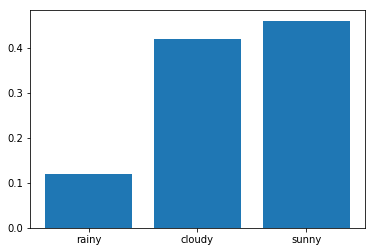

In [22]:
x = [0,1,2]  #specify where on the x-axis you want to plot the histogram.
plt.bar(x,height=[rainy,cloudy,sunny]) # the heaght of each bar.
plt.xticks(x, ['rainy','cloudy','sunny']) # the name of each bar, shown below the x-axis.
plt.show() #show the plot   

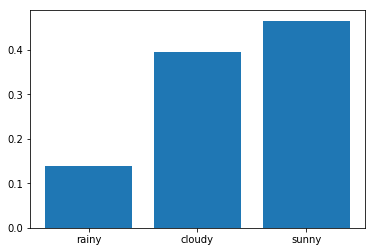

In [20]:
x = [0,1,2]  #specify where on the x-axis you want to plot the histogram.
plt.bar(x,height=w) # the heaght of each bar.
plt.xticks(x, ['rainy','cloudy','sunny']) # the name of each bar, shown below the x-axis.
plt.show() #show the plot 